<h1><strong>Credit Card Fraud Detection</strong></h1>
<h2><strong>Anonymized credit card transactions labeled as fraudulent or genuine</strong></h2>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

<strong>The dataset contains transactions made by credit cards in September 2013 by European cardholders.</strong>
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


<h2>Importing the libraries</h2>

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the dataset

df = pd.read_csv("creditcard.csv")

<h2>Expoloratory analysis of the dataset</h2>

In [4]:
#viewing the dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

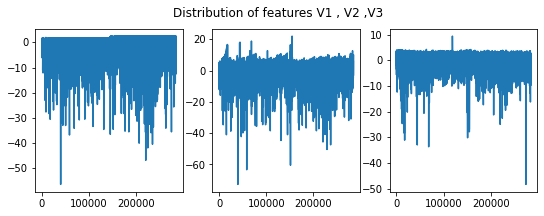

In [43]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.plot(df['V1'])
plt.subplot(132)
plt.plot(df['V2'])
plt.subplot(133)
plt.plot(df['V3'])
plt.suptitle('Distribution of features V1 , V2 ,V3')
plt.show()

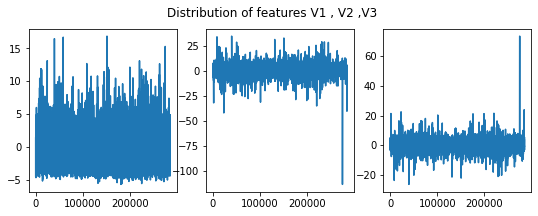

In [44]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.plot(df['V4'])
plt.subplot(132)
plt.plot(df['V5'])
plt.subplot(133)
plt.plot(df['V6'])
plt.suptitle('Distribution of features V1 , V2 ,V3')
plt.show()

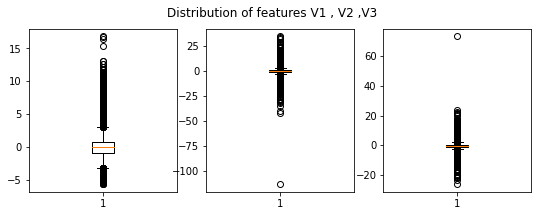

In [46]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.boxplot(df['V4'])
plt.subplot(132)
plt.boxplot(df['V5'])
plt.subplot(133)
plt.boxplot(df['V6'])
plt.suptitle('Distribution of features V1 , V2 ,V3')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#checking fo the null values

print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
#checking for dupicate

df.duplicated().sum()

1081

In [10]:
#Removing dupicate
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

<h2>Understanding the range of the data columns</h2>

In [12]:
df_min= df.min(axis=0)

In [13]:
df_max= df.max(axis=0)

In [14]:
df_min

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64

In [15]:
df_minmax = df_min.to_frame()


In [16]:
df_minmax = df_minmax.rename(columns = {'item':'Minimum'})


df_minmax

,0
Time,0.000000
V1,-56.407510
V2,-72.715728
V3,-48.325589
V4,-5.683171
V5,-113.743307
V6,-26.160506
V7,-43.557242
V8,-73.216718
V9,-13.434066


In [17]:
df_minmax['Maximum'] = df_max


In [18]:
df_minmax

,0,Maximum
Time,0.000000,172792.000000
V1,-56.407510,2.454930
V2,-72.715728,22.057729
V3,-48.325589,9.382558
V4,-5.683171,16.875344
V5,-113.743307,34.801666
V6,-26.160506,73.301626
V7,-43.557242,120.589494
V8,-73.216718,20.007208
V9,-13.434066,15.594995


In [19]:
df.drop(["Time","Amount"],axis=1,inplace=True)

<h2>Scaling the dataset</h2>

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [22]:
X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [23]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
# standardization 
X = StandardScaler().fit_transform(X) 
print(scale)

[[-0.70108232 -0.04168726  1.68010106 ... -0.39262206  0.33303251
  -0.06584955]
 [ 0.60879165  0.16413764  0.10927902 ...  0.26085374 -0.0271543
   0.0432187 ]
 [-0.7003364  -0.81133678  1.17426962 ... -0.28886092 -0.14432548
  -0.18382429]
 ...
 [ 0.98235398 -0.18043304 -2.15503257 ... -0.18155722  0.00680174
  -0.08264021]
 [-0.12646526  0.32465977  0.46457662 ...  1.13373436  0.27052318
   0.31700384]
 [-0.27686005 -0.1127094   0.46512487 ... -1.69777619 -0.01055821
   0.03994074]]


<h2>Splitting the dataset</h2>

In [61]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

<h2>Building the Model</h2>

In [62]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [63]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.998748810488845


<h2>Visualizing the tree</h2>

<h3>This is to see the model structure</h3>

[Text(0.2959245503397843, 0.9807692307692307, 'X[16] <= -2.754\ngini = 0.003\nsamples = 226980\nvalue = [226620, 360]'),
 Text(0.2168710296941941, 0.9423076923076923, 'X[9] <= -1.458\ngini = 0.36\nsamples = 310\nvalue = [73, 237]'),
 Text(0.1453685921110947, 0.9038461538461539, 'X[25] <= -0.225\ngini = 0.285\nsamples = 279\nvalue = [48, 231]'),
 Text(0.0874575269611464, 0.8653846153846154, 'X[26] <= 0.915\ngini = 0.453\nsamples = 101\nvalue = [35, 66]'),
 Text(0.06145664056729207, 0.8269230769230769, 'X[11] <= -2.558\ngini = 0.203\nsamples = 61\nvalue = [7, 54]'),
 Text(0.03781947111833358, 0.7884615384615384, 'X[24] <= 0.475\ngini = 0.101\nsamples = 56\nvalue = [3, 53]'),
 Text(0.01890973555916679, 0.75, 'X[27] <= 0.825\ngini = 0.037\nsamples = 53\nvalue = [1, 52]'),
 Text(0.009454867779583395, 0.7115384615384616, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.028364603338750186, 0.7115384615384616, 'X[18] <= 2.147\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.0189097355

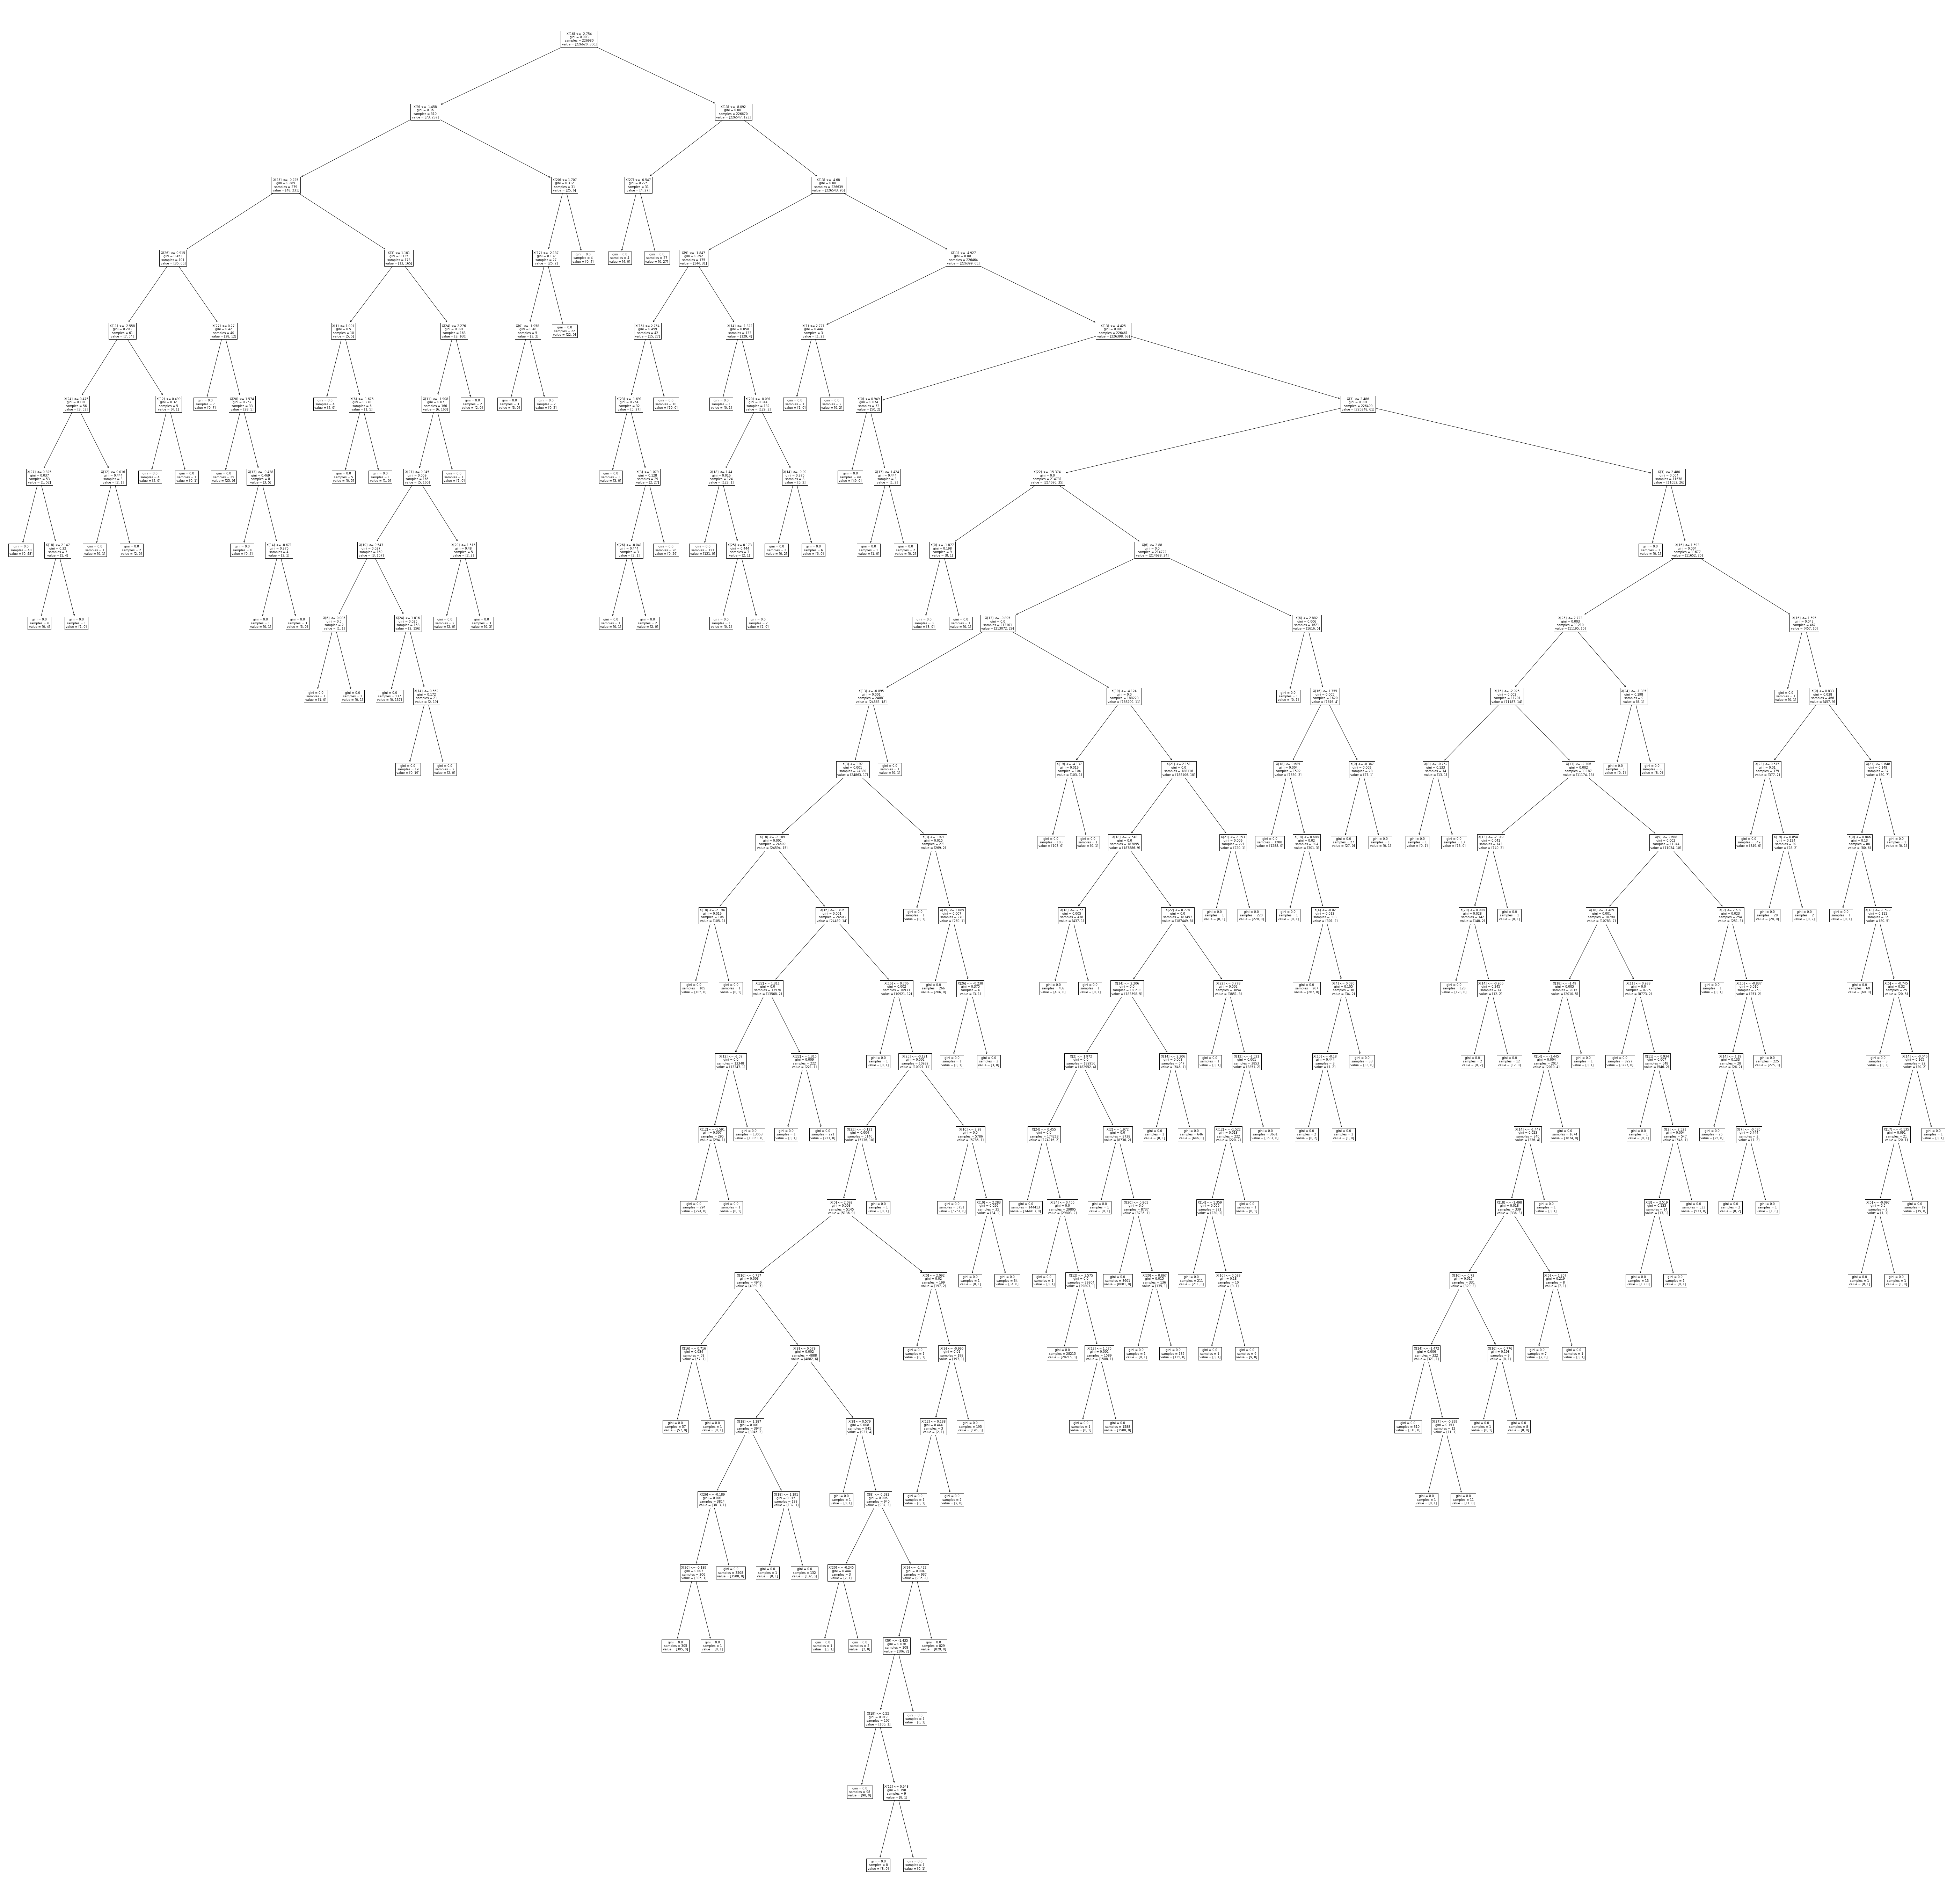

In [28]:
from sklearn import tree
plt.figure(figsize=(100,100))
tree.plot_tree(clf)

In [29]:
from sklearn.metrics import confusion_matrix


# we are using the test data and seeing how did the model predict the values
confusion_matrix(y_test, y_pred)

array([[56593,    40],
       [   25,    88]], dtype=int64)

<h2>Reducing the biasness of dataset</h2>

In [47]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [49]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

<h3><strong>To overcome the biasness of the dataset I have used the oversampling technique</strong></h3>

In [50]:
ros = RandomOverSampler(random_state=0)
x_resample, y_resample = ros.fit_resample(X, Y)
print((Counter(y_resample)))

Counter({0: 283253, 1: 283253})


In [51]:
x_resample

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [-4.06400474e+00,  3.10093489e+00, -1.18849800e+00, ...,
        -4.09862744e-01, -3.03627133e+00, -6.30605199e-01],
       [-9.16978982e+00,  7.09219680e+00, -1.23540369e+01, ...,
        -2.64324609e-01,  1.15969046e+00,  2.32758088e-01],
       [-2.32692237e+00, -3.34843873e+00, -3.51340796e+00, ...,
         5.31910616e-01,  3.02324354e-01,  5.36375348e-01]])

In [52]:
y_resample

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [55]:
# standardization 
x_resample = StandardScaler().fit_transform(x_resample) 
print(x_resample)

[[ 0.16392139 -0.49561097  0.97974092 ... -0.45300582  0.02750954
  -0.13642037]
 [ 0.64239714 -0.40034359  0.58515277 ...  0.21295285 -0.1262396
  -0.05585436]
 [ 0.16419386 -0.85184821  0.85267682 ... -0.34726261 -0.17625523
  -0.22356539]
 ...
 [-0.34315669  0.39646099  0.35954585 ... -0.9196871  -3.39155572
  -1.50905855]
 [-1.30056884  1.51832973 -1.49954158 ... -0.61200615  1.13432375
   0.43513182]
 [-0.01742739 -1.41633677 -0.0275569  ...  1.07130803  0.20954516
   1.1188414 ]]


In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=100)

In [58]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [59]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9998234806093449


In [64]:
from sklearn.metrics import confusion_matrix


# we are using the test data and seeing how did the model predict the values
confusion_matrix(y_test, y_pred)

array([[56590,    43],
       [   28,    85]], dtype=int64)